### Lê Thị Hiếu Thảo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv('./Data_Midterm.csv')
df.head(1000)

,Unnamed: 0,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,1,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,2,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,3,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,4,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,Audi,A3,2017,14995,Manual,14488,Petrol,150.0,60.1,1.4
996,996,Audi,Q2,2019,22995,Semi-Auto,3049,Petrol,150.0,43.5,1.5
997,997,Audi,A6,2019,45995,Semi-Auto,7461,Diesel,150.0,37.7,3.0
998,998,Audi,Q5,2017,33495,Semi-Auto,37492,Petrol,150.0,34.0,3.0


In [3]:
df.shape


(108540, 11)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    108540 non-null  int64  
 1   Brand         108540 non-null  object 
 2   model         108540 non-null  object 
 3   year          108540 non-null  int64  
 4   price         108540 non-null  int64  
 5   transmission  108540 non-null  object 
 6   mileage       108540 non-null  int64  
 7   fuelType      108540 non-null  object 
 8   tax           99187 non-null   float64
 9   mpg           99187 non-null   float64
 10  engineSize    108540 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 9.1+ MB


In [5]:
df.isnull().sum()

Unnamed: 0         0
Brand              0
model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             9353
mpg             9353
engineSize         0
dtype: int64

In [6]:
df = df[~pd.isna(df).any(axis=1)].reset_index(drop=True)
df.head()

,Unnamed: 0,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,1,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,2,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,3,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,4,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    99187 non-null  int64  
 1   Brand         99187 non-null  object 
 2   model         99187 non-null  object 
 3   year          99187 non-null  int64  
 4   price         99187 non-null  int64  
 5   transmission  99187 non-null  object 
 6   mileage       99187 non-null  int64  
 7   fuelType      99187 non-null  object 
 8   tax           99187 non-null  float64
 9   mpg           99187 non-null  float64
 10  engineSize    99187 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 8.3+ MB


In [8]:
df.describe()

,Unnamed: 0,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,56923.431548,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,31494.525560,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,0.000000,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,34149.500000,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,58946.000000,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,83742.500000,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,108539.000000,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [9]:
X= df.drop([col for col in ['Unnamed: 0','model','year','transmission','fuelType','tax'] if col in df], axis =1, inplace = True)
df.head()

,Brand,price,mileage,mpg,engineSize
0,Audi,12500,15735,55.4,1.4
1,Audi,16500,36203,64.2,2.0
2,Audi,11000,29946,55.4,1.4
3,Audi,16800,25952,67.3,2.0
4,Audi,17300,1998,49.6,1.0


In [10]:
print(df['Brand'].unique())
len(df['Brand'].unique())

['Audi' 'BMW' 'Ford' 'Huyndai' 'Mercedes' 'Skoda' 'Toyota' 'Vauxhall'
 'Volkswagen']


9

In [11]:
Y = df
a = df['Brand']

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['Brand'] = le.fit_transform(Y['Brand'])
a = le.transform(a)

In [13]:
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       99187 non-null  int32  
 1   price       99187 non-null  int64  
 2   mileage     99187 non-null  int64  
 3   mpg         99187 non-null  float64
 4   engineSize  99187 non-null  float64
dtypes: float64(2), int32(1), int64(2)
memory usage: 3.4 MB
None


In [14]:
Y.head()

,Brand,price,mileage,mpg,engineSize
0,0,12500,15735,55.4,1.4
1,0,16500,36203,64.2,2.0
2,0,11000,29946,55.4,1.4
3,0,16800,25952,67.3,2.0
4,0,17300,1998,49.6,1.0


In [15]:
cols = Y.columns
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
Y = ms.fit_transform(Y)

In [16]:
Y = pd.DataFrame(Y, columns=[cols])
Y.head()
x= df['price']

In [17]:
# chuan hoa bang min_max scale
df.columns = ['Brand','price','mileage','mpg' , 'engineSize']
names = ['Brand','price','mileage','mpg' , 'engineSize']
for i in names:
    df[i] = (df[i] - min(df[i])) / (max(df[i]) - min(df[i]))
df.head()

,Brand,price,mileage,mpg,engineSize
0,0.0,0.075525,0.048712,0.117109,0.212121
1,0.0,0.100596,0.112081,0.135813,0.303030
2,0.0,0.066124,0.092709,0.117109,0.212121
3,0.0,0.102476,0.080344,0.142402,0.303030
4,0.0,0.105610,0.006183,0.104782,0.151515


In [18]:
df.corr()


,Brand,price,mileage,mpg,engineSize
Brand,1.000000,-0.225032,-0.038214,-0.014466,-0.220618
price,-0.225032,1.000000,-0.417954,-0.296429,0.638114
mileage,-0.038214,-0.417954,1.000000,0.185657,0.109073
mpg,-0.014466,-0.296429,0.185657,1.000000,-0.248210
engineSize,-0.220618,0.638114,0.109073,-0.248210,1.000000


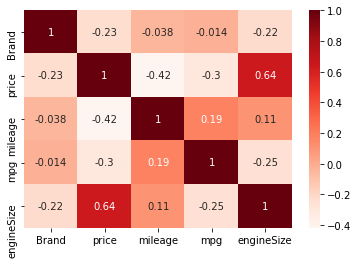

In [19]:
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Reds)
plt.show()

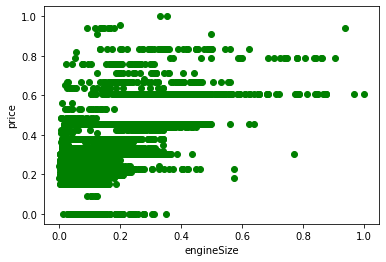

In [20]:
plt.plot(df['price'],df['engineSize'],'go')
plt.xlabel('engineSize')
plt.ylabel('price')
plt.show()

In [21]:
# Loại bỏ các giá trị ngoại lai:
q1 = df['engineSize'].quantile(q=0.25)
q3 = df['engineSize'].quantile(q=0.75)
iqr = q3 - q1
# Tính cận trên, cận dưới
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
# Loại bỏ outlier
df = df[(df['engineSize']>lower) & (df['engineSize']<upper)]

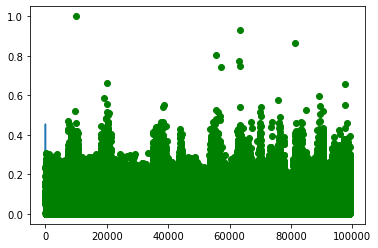

In [22]:
plt.plot(df['price'],df['engineSize'],df['mileage'],'go')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score
df_train, df_test = train_test_split(df,test_size=0.2)

In [24]:
# xoa dữ liệu null
df_train= df_train.dropna().reset_index(drop=True)

In [25]:
X = df_train[["engineSize", 'mileage']].values
y = df_train['price'].values

In [26]:
# doi chieu vecto  
y = np.array(y)
y = y.reshape(y.shape[0], 1)

X = np.array(X)
X = X.reshape(X.shape[0], 2)
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis =1)


In [27]:
#tinh ra cột trong so hoi quy
A = np.dot(Xbar.T, Xbar) 
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
w0 = w[0][0]
w1 = w[1][0]
w2 = w[2][0]
w

array([[ 0.00511112],
       [ 0.51398961],
       [-0.45691855]])

In [28]:
X_test=np.array(df_test[["engineSize", 'mileage']])
y_test=np.array(df_test['price'])
y_pred=w0+w1*X_test[:, 0] + w2 * X_test[:, 1]

In [29]:
# du lieu co do lon khong tuong dong nhu nhau vì vay tui em da dung nhiu phuong phap scale
#khac nhau chinh vi vay ma tui e chu trong vao chi so mape vao Rsquare de danh gia mo hinh vi no 
#khong phu thuoc vao do lon cua cac bien
def mape(actual, pred): 
    return sum(abs(pred-actual) / (actual))
mape(y_test, y_pred)

434.947979718544

In [30]:
def loss_funtion(m,b, price):
    total_error = 0
    for i in range (len(price)):
        x= price.iloc[i].engineSize
        x1=  price.iloc[i].mileage
        y= price.iloc[i].price
        total_error += (y - (m*x+m*x1+b))**2
    return  total_error/ float(len(price))

In [31]:
# doi khi trong vai bai toán cu the là bài toán LR thì việc tìm GTLN và GTNN là rất phức tạp và đôi khi là không khả thi luôn.
# nên tụi em tìm các điểm local minium ở mực độ nhẹ nhàng nhất thoi, và coi nó là nghiệm của bài toán
# đây chính là đạo hàm của hàm mất mát
def price_descent(m_now,b_now, price,L):
    m_price =0
    b_price= 0
    n=len(price)
    
    for i in range(n):
        x= price.iloc[i].engineSize
        x1=  price.iloc[i].mileage
        y= price.iloc[i].price
        m_price += -(2/n)*x*(y-(m_now*x+m_now*x1+b_now))
        b_price += (2/n)*(y-(m_now*x+m_now*x1+b_now))
    m = m_now -  m_price * L
    b = b_now - b_price *L
    return m,b


In [32]:
# thuc hien train 2 lan
m = 0
b = 0
L = 0.00001
epochs =2

for i in range(epochs):
    if i % 50 ==0:
        print(f'Epochs:{i} ')
    m, b = price_descent(m,b,df,L)
print(m,b)

Epochs:0 
1.118842031608862e-06 -4.038568364453593e-06


In [33]:
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(np.array(df_train['engineSize']).reshape(-1,1), df_train['price'])
print(regr.coef_ )

[0.46609698]


In [34]:
print(regr.intercept_)

-0.015579960490958347


In [35]:
y_predict= regr.predict(np.array(X_test).reshape(-1,1))

In [36]:
print('MAE =', metrics.mean_absolute_error(y_test, y_pred))

MAE = 0.024766625029770173


In [37]:
print('MSE =',metrics.mean_squared_error(y_test, y_pred))

MSE = 0.0011136533367283455


In [38]:
from sklearn.metrics import mean_squared_error
import math

In [39]:
print('RMSE =', math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE = 0.03337144493018463


In [40]:
from sklearn.metrics import r2_score
print ('R2_square=',r2_score(y_test, y_pred))

R2_square= 0.6626221409829183


# sử dụng công thức toán MAE
print('MAE =', metrics.mean_absolute_error(y_test, y_pred))

# sử dụng công thức toán MSE
print('MSE =',metrics.mean_squared_error(y_test, y_pred))

# sử dụng công thức toán RMSE
import math
from sklearn.metrics import mean_squared_error
print('RMSE =', math.sqrt(mean_squared_error(y_test, y_pred)))
